## 1

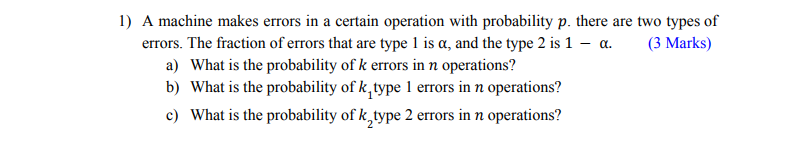

**a)**

The probability of k errors in n operations can be modelled with a binomial distribution.

$$
P(X = k) = \binom{n}{k} \, p^k \, (1-p)^{n-k}
$$

**b)**

Again we use the binomial distribution. Since we want to know the probability of type 1  
we multiply $p$ by $\alpha$ to obtain the probability

$$
P(X = k) = \binom{n}{k} \, (p\alpha)^k \, (1-p\alpha)^{n-k}
$$

**c)**

Here we do nearly the same as above, but we multiply $p$ by $1-\alpha$

$$
P(X = k) = \binom{n}{k} \, (p(1-\alpha))^k \, (1-p(1-\alpha))^{n-k}
$$



## 2

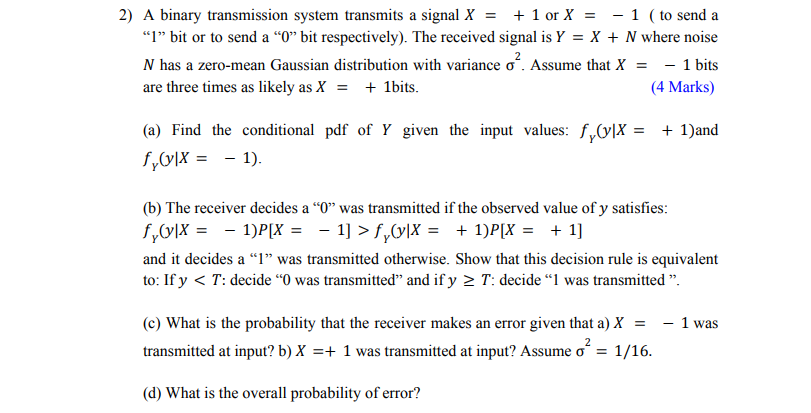

**a)** 

We know that $Y=X+N$ where $N \sim \mathcal{N}(0, \sigma^2)$

When transmitting $X=1$ or $X=-1$ we are adding a constant to the normal distrubution and shifting it's mean, hence the conditional pdf's are:

$$
fY(y|X=1) = \frac{1}{\sqrt{2\pi\sigma^2}} 
\exp\!\left( -\frac{(y - 1)^2}{2\sigma^2} \right), 
\quad -\infty < y < \infty
$$

$$
fY(y|X=-1) = \frac{1}{\sqrt{2\pi\sigma^2}} 
\exp\!\left( -\frac{(y + 1)^2}{2\sigma^2} \right), 
\quad -\infty < y < \infty
$$

**b)**

We know that $P[X=1]=\frac{1}{4}$ and $P[X=-1]=\frac{3}{4}$ so the inequality becomes

$\frac{1}{\sqrt{2\pi\sigma^2}} 
\exp\!\left( -\frac{(y + 1)^2}{2\sigma^2} \right) \frac{3}{4} > \frac{1}{\sqrt{2\pi\sigma^2}} 
\exp\!\left( -\frac{(y - 1)^2}{2\sigma^2} \right) \frac{1}{4}$

We divide by $\frac{1}{\sqrt{2\pi\sigma^2}}$ and $\frac{1}{4}$ on each side

$\exp\!\left( -\frac{(y + 1)^2}{2\sigma^2} \right) 3 > 
\exp\!\left( -\frac{(y - 1)^2}{2\sigma^2} \right)$

We take the natural log to each side

$ -\frac{(y + 1)^2}{2\sigma^2} + ln(3) > -\frac{(y - 1)^2}{2\sigma^2}$

Move on of the terms

$ ln(3) > \frac{(y + 1)^2-(y - 1)^2}{2\sigma^2}$

We reduce

$(y + 1)^2-(y - 1)^2=(y + 1)(y + 1)-(y - 1)(y - 1)=y^2+2y+1-(y^2-2y+1)=y^2+2y+1-y^2+2y-1=4y$

And insert back

$ ln(3) > \frac{4y}{2\sigma^2}$

And solve for $y$

$ y < \frac{ln(3) \sigma^2}{2}$

**c)**

If $X=-1$ was transmitted and transmission is a success, then $y<T$ where $T=?$.  
If the tranmission is not successfull that means $y \geq T$. This probability can be modelled as

$P_{error}[Y \geq T|X=-1]=1-P_{error}[Y < T|X=-1]$

$ T = \frac{ln(3)\sigma^2}{2} \approx 0.0343$

If we normalize $T$ by using $\mu$ and $\sigma$ we can use the standard normal CDF to calculate the probability.

We know that since $\sigma^2=1/16$ then $\sigma=1/4$ 

$F_Y(y|X=-1) = \Phi\!\left( \frac{y - \mu_y}{\sigma_y} \right) = \Phi\!\left( \frac{y - 1}{1/4} \right) \approx 0.99998243$

Hence the probability for transmission error when transmitting $X=-1$ is 

$P_{error}[Y \geq T|X=-1]\approx1-0.6802 \approx 0.00001757$

Likewise we can do the same for when $X=1$ is transmitted

$P_{error}[Y < T|X=1]=1-P_{error}[Y >= T|X=1]$

$F_Y(y|X=1) = \Phi\!\left( \frac{y + 1}{1/4} \right) \approx 0.00005608$

In [67]:
#Calculate T

sigma2=1/16

T = np.log(3)*(sigma2)/2
print(f"T={T:.4f}")

T=0.0343


In [68]:
# Calculation of P(E|X=-1)

mu_x0 = -1

p_x0 = 3/4
p_x1 = 1/4

# The probability of succes when transmitting X=-1 is p(y<T|X=-1)
z = (T-mu_x0)/np.sqrt(sigma2)

print(f"Z={z}")

p_success_x0 = norm.cdf(z)

# The probability of error is 1-P(succes)
p_error_x0 = 1 - p_success_x0

print(f"p_success_x0={p_success_x0:.8f}\np_error_x0  ={p_error_x0:.8f}")

Z=4.137326536083513
p_success_x0=0.99998243
p_error_x0  =0.00001757


In [69]:
# Calculation of P(E|X=1)

mu_x1 = 1

p_x0 = 3/4
p_x1 = 1/4

# The probability of error when transmitting X=1 is p(y<T|X=1)
z = (T-mu_x1)/np.sqrt(sigma2)
p_error_x1 = norm.cdf(z)

# The probability of success is 1-P(error)
p_success_x1 = 1 - p_error_x1

print(f"p_success_x1={p_success_x1:.8f}\np_error_x1  ={p_error_x1:.8f}")

p_success_x1=0.99994392
p_error_x1  =0.00005608


**d)**

We define the event $E_0$ as sending $X=-1$ and detecting $X=1$ and event $E_1$ as sending $X=1$ and detecting $X=-1$

$E_0=\{y \geq T \cap X=-1\}$

$E_1=\{y < T \cap X=1\}$

Then we define event $E$ as the event where $E_0$ or $E_1$ happens

$E=\{E_0 \cup E_1\} = \{(y \geq T \cap X=-1) \cup (y < T \cap X=1)\}$

We use the relation that $P(E_0 \cup E_1)=P(E_0)+P(E_1)-P(E_0 \cap E_1)$.  
Given that $\{E_0 \cap E_1 \}=\emptyset$ then $P[E_0 \cap E_1 ]=0$ and $P(E_0 \cup E_1)=P(E_0)+P(E_1)$.

Using the relation $P(E|X)=\frac{P(E \cap X)}{P(X)}$ we can define the probability of the event as

$P(E)=P[y \geq T | X=-1]P[X=-1] + P[y < T | X=1]P[X=1] \approx 0.00002720$

In [70]:
# Calculating total probability

p_error = p_error_x0 * p_x0 + p_error_x1 * p_x1
print(f"p_error: {p_error:.8f}")

p_error: 0.00002720


## 4 

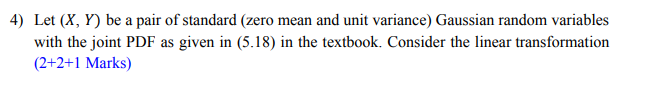

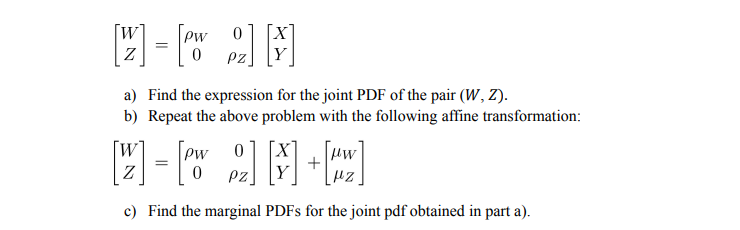

**a)** 

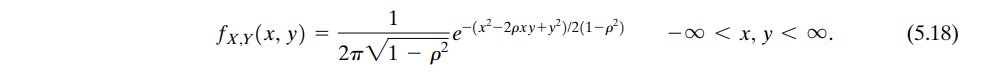

The distribution $f_{x,y}(x,y)$ in 5.18 is the bivariate normal distribution with $\mu_x=0$, $\mu_y=0$, $\sigma_x^2=1$ and $\sigma_y^2=1$

We define 
$
A=\begin{bmatrix}
\rho_w & 0 \\
0 & \rho_z
\end{bmatrix}
$ as the transformation matrix between such that 
$
\begin{bmatrix}
W \\
Z
\end{bmatrix}
=
A
\begin{bmatrix}
X \\
Y
\end{bmatrix}
$

The PDF of $W$ and $Z$ which are a linear transform of $X$ and $Y$ can be computed as 

$$
f_{W,Z} = \frac{f_{X,Y}}{\left|\frac{dP}{dxdy}\right|}
$$

Where $\left|\frac{dP}{dxdy}\right|=\left|A\right|=\rho_w \rho_z$ and $A^{-1}
\begin{bmatrix}
w \\
z
\end{bmatrix} = \begin{bmatrix}
\frac{x}{\rho_w} \\
\frac{y}{\rho_z}
\end{bmatrix}$

Hence the PDF of $\begin{bmatrix}
W \\
Z
\end{bmatrix}$ becomes

$$
f_{W,Z}(w,z) =
\frac{1}{\rho_w \rho_z 2\pi \sqrt{1-\rho^2}}
\exp\!\Bigg(
-\frac{\frac{w^2}{\rho_w^2} - 2\rho \frac{wz}{\rho_w \rho_z} + \frac{z^2}{\rho_z^2}}{2(1-\rho^2)}
\Bigg)
$$

**b)**

Since the expectation operator is linear and $X,Y$ has zero mean, we know that

$\mathbb{E}\Bigg[
\begin{bmatrix}
W \\
Z
\end{bmatrix}\Bigg] = A \mathbb{E}\Bigg[
\begin{bmatrix}
X \\
Y
\end{bmatrix}\Bigg] + 
\mathbb{E}\Bigg[
\begin{bmatrix}
\mu_w \\
\mu_z
\end{bmatrix}
\Bigg]=\begin{bmatrix}
\mu_w \\
\mu_z
\end{bmatrix}$

Hence, we only have a shift in the PDF, which we now can express as

$$
f_{W,Z}(w,z) =
\frac{1}{\rho_w \rho_z 2\pi \sqrt{1-\rho^2}}
\exp\!\Bigg(
-\frac{\frac{(w-\mu_w)^2}{\rho_w^2} - 2\rho \frac{(w-\mu_w)(z-\mu_z)}{\rho_w \rho_z} + \frac{(z-\mu_z)^2}{\rho_z^2}}{2(1-\rho^2)}
\Bigg)
$$

**c)**

We know that the marginal PDF's of a bivariate distribution are normally distributed. Hence, we can read the marginal PDF's from the joint PDF  
given the normal form of the bivariate normal distribution as shown here

$$
f_{W,Z}(w,z) = \frac{1}{2\pi\sigma_w\sigma_z\sqrt{1-\rho^2}} \exp\left(-\frac{\frac{(x-\mu_w)^2}{\sigma_w^2} - 2\rho\frac{(w-\mu_w)(z-\mu_z)}{\sigma_w\sigma_z} + \frac{(z-\mu_z)^2}{\sigma_z^2}}{2(1-\rho^2)}\right)
$$

From the results in **b)** we can see that $\mu_w=\mu_w$, $\mu_z=\mu_z$, $\sigma_w=\rho_w$ and $\sigma_z=\rho_z$. Since there is no longer a relationship between the variables, the $\rho$ term is no longer used.

Then the marginal PDF's of $f_{W,Z}(w,z)$ can be found as 

$$
f_W(w)= \int_{-\infty}^{\infty} f_{W,Z}(w,z) dy = \frac{1}{\rho_w\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{w-\mu_w}{\rho_w}\right)^2}
$$

$$
f_Z(z)= \int_{-\infty}^{\infty} f_{W,Z}(w,z) dy = \frac{1}{\rho_z\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{z-\mu_z}{\rho_z}\right)^2}
$$

## 5

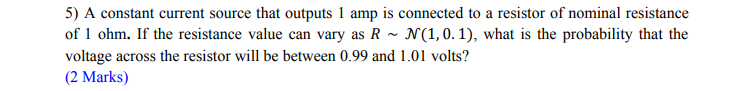

Since $V=RI$ and $I=1$ then $V=R$

$$
V\sim \mathcal{N}(\mu=1, \sigma^2=0.1)
$$

We can transform that to a standard normal $Z=\frac{z-1}{\sqrt(0.1)}$

Then the probability becomes

$P[X > 0.99 \cap X < 1.01] = P[0.99 < X < 1.01] = P[X < 1.01] - P[X < 0.99]=0.02523$



In [71]:
import scipy.stats as stats

Z_1=(0.99-1)/np.sqrt(0.1)
Z_2=(1.01-1)/np.sqrt(0.1)

p_1 = stats.norm.cdf(Z_1)
p_2 = stats.norm.cdf(Z_2)

p = p_2 - p_1
print(p)

0.025227120630039623


## 7

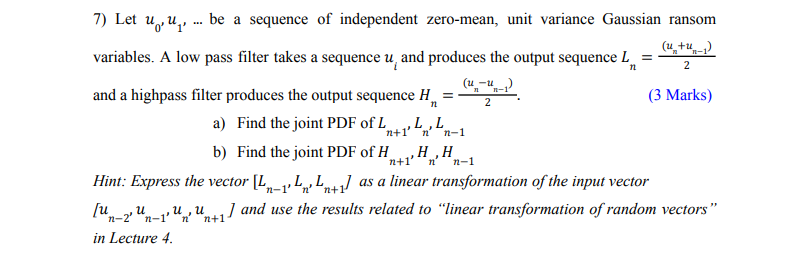

### Low Pass filter

We define the matrices the linear transformations as 

$L=A_L U$

Where

$$
A_L = 
\begin{bmatrix}
\tfrac{1}{2} & \tfrac{1}{2} & 0 & 0 \\[6pt]
0 & \tfrac{1}{2} & \tfrac{1}{2} & 0 \\[6pt]
0 & 0 & \tfrac{1}{2} & \tfrac{1}{2}
\end{bmatrix}.
$$

$$
U = [u_{n-2}, u_{n-1}, u_{n}, u_{n+1}]
$$

Since $U$ is zero mean, $L$ will also have zero mean.
The covariance will be transformed as $Cov(L)=A_LCov(U)A_L^T$ where $Cov(U)=I$.

Hence $Cov(L)=A_LA_L^T=
\begin{bmatrix}
\tfrac{1}{2} & \tfrac{1}{4} & 0 \\[6pt]
\tfrac{1}{4} & \tfrac{1}{2} & \tfrac{1}{4} \\[6pt]
0 & \tfrac{1}{4} & \tfrac{1}{2}
\end{bmatrix}$

And the PDF of $L$ will be $L \sim \mathcal{N}\bigg(\begin{bmatrix}
0 \\ 
0 \\ 
0 \\ 
0
\end{bmatrix}, \begin{bmatrix}
\tfrac{1}{2} & \tfrac{1}{4} & 0 \\[6pt]
\tfrac{1}{4} & \tfrac{1}{2} & \tfrac{1}{4} \\[6pt]
0 & \tfrac{1}{4} & \tfrac{1}{2}
\end{bmatrix}\bigg)$

### High Pass Filter

For the high pass filter we define $H=A_H U$

Where $$
A_H = 
\begin{bmatrix}
-\tfrac{1}{2} & \tfrac{1}{2} & 0 & 0 \\[6pt]
0 & -\tfrac{1}{2} & \tfrac{1}{2} & 0 \\[6pt]
0 & 0 & -\tfrac{1}{2} & \tfrac{1}{2}
\end{bmatrix}.
$$

Hence $Cov(H)=A_HA_H^T=
\begin{bmatrix}
\tfrac{1}{2} & -\tfrac{1}{4} & 0 \\[6pt]
-\tfrac{1}{4} & \tfrac{1}{2} & -\tfrac{1}{4} \\[6pt]
0 & -\tfrac{1}{4} & \tfrac{1}{2}
\end{bmatrix}$

And the PDF of $H$ will be $H \sim \mathcal{N}\bigg(\begin{bmatrix}
0 \\ 
0 \\ 
0 \\ 
0
\end{bmatrix}, \begin{bmatrix}
\tfrac{1}{2} & -\tfrac{1}{4} & 0 \\[6pt]
-\tfrac{1}{4} & \tfrac{1}{2} & -\tfrac{1}{4} \\[6pt]
0 & -\tfrac{1}{4} & \tfrac{1}{2}
\end{bmatrix}\bigg)$